In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
data_train = np.load('../Data/RealData/all_back_train.npy')
data_test = np.load('../Data/RealData/all_back_test.npy')
signals_train, signals_test = data_train[:, :1000], data_test[:, :1000]
labels_train, labels_test = data_train[:, 1000:], data_test[:, 1000:]
data_train.shape, data_test.shape

((4672, 1006), (1655, 1006))

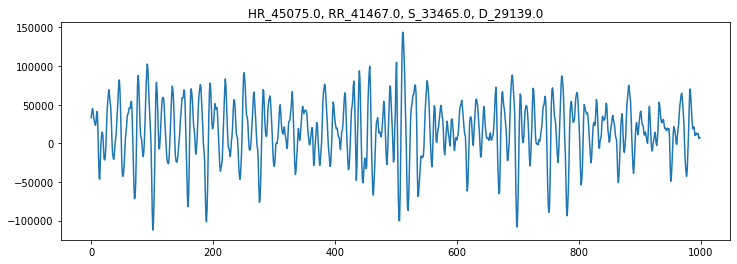

In [4]:
for i in range(20):
    plt.figure(figsize=(12, 4))
    plt.plot(signals_test[i])
    plt.title(f'HR_{signals_test[i, 2]}, RR_{signals_test[i, 3]}, S_{signals_test[i, 4]}, D_{signals_test[i, 5]}')
    break

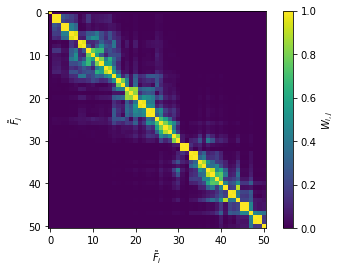

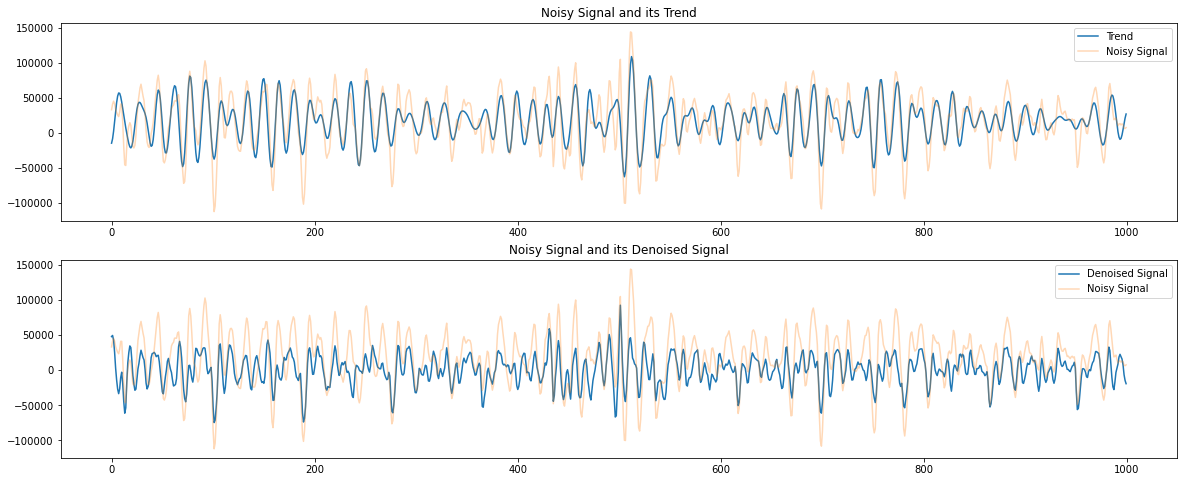

In [7]:
from Code.Tutorial.algo_ssa import SSA
L = 100
for i in range(30):
    signal = signals_test[i]
    emp_point = 8
    ssa_ = SSA(signal, L)

    ssa_.plot_wcorr(0, 50)
    plt.show()

    plt.subplots(2, 1, figsize=(20, 8))
    plt.subplot(2, 1, 1)
    ssa_.reconstruct(slice(0, emp_point)).plot(label='Trend')
    ssa_.orig_TS.plot(alpha=0.3, label='Noisy Signal')
    plt.title('Noisy Signal and its Trend')
    plt.legend()
    plt.subplot(2, 1, 2)
    ssa_.reconstruct(slice(emp_point, L)).plot(label='Denoised Signal')
    # peaks_emp = get_peaks(ssa_.reconstruct(slice(emp_point, L)), 10, duration, fs)
    ssa_.orig_TS.plot(alpha=0.3, label='Noisy Signal')

    # plt.scatter(peaks_emp, ssa_.reconstruct(slice(emp_point, L))[peaks_emp], label='emp')
    plt.title('Noisy Signal and its Denoised Signal')
    plt.legend()
    plt.savefig('./real_data.jpg', dpi=300)
    plt.show()
    print()
    break